### Imports:

In [1]:
import numpy as np
import random
import data_generation
import high_precision_lr as opt
import low_precision_lr as lp
import precision_util as p_util
import naive_low_precision_lr as naive

%matplotlib inline
import matplotlib.pyplot as plt

### Generating Data:
* n: number of data points
* d: number of dimensions
* s: scale factor for data (x)
* w: generated true weights (floating points range between -1 and 1)
* x: generated data (x - n by d) (int8 representation with s scale factor)
* y: generated labels for each x data point (floating point) - w*x^T
* xt: ignore this, just extra output from generation
* x_fp: full precision representation of x (floating point)

In [2]:
n = 100000
d=20
s = 1/128.0
w,x,y,xt = data_generation.generate_data_low_precision_linear_regression(d,n,s)
x_fp = p_util.low_precision_to_float(x,s)

### Running normal SGD

In [9]:
weights_sgd = opt.sgd(0.01, x_fp, y, 10000)
loss_sgd = opt.loss(weights_sgd, x_fp, y)
print("Loss for SGD: " + str(loss_sgd))

Loss for SGD: 1.07417458097e-12


### Running normal SVRG

In [10]:
weights_svrg, time_array, loss_array = opt.svrg(0.00001, x_fp, y, 10, 2*n, calc_loss=True)
loss_svrg = opt.loss(weights_svrg, x_fp, y)
print("Loss for Full Precision SVRG: " + str(loss_svrg))

Loss for Full Precision SVRG: 0.00516681943149


#### Plotting Time

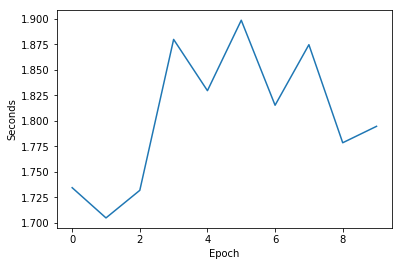

In [11]:
plt.plot(time_array)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Training Loss

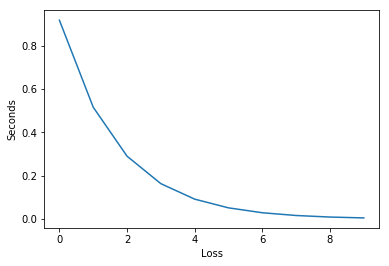

In [13]:
plt.plot(loss_array)
plt.ylabel('Seconds')
plt.xlabel('Loss')
plt.show()

### Running Naive LP SVRG

In [14]:
weights_slow_lp_svrg, time_slow_array, loss_slow_array = naive.lp_svrg_lr(0.01, x_fp, y, 10)
loss_slow_svrg = opt.loss(weights_slow_lp_svrg, x_fp, y)
print(loss_slow_svrg)

KeyboardInterrupt: 

#### Plotting Time

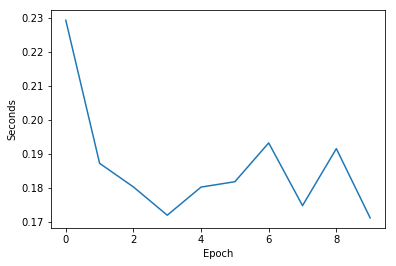

In [22]:
plt.plot(time_slow_array)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Error

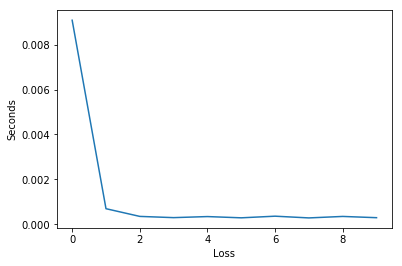

In [23]:
plt.plot(loss_slow_array)
plt.ylabel('Seconds')
plt.xlabel('Loss')
plt.show()

### LP-SVRG - Algorithm 3

In [13]:
weights_svrg_lp, time_array_lp, loss_array_lp = lp.svrg(0.000001, x, y, 10, 2*n, calc_loss=True)
loss_svrg_lp = opt.loss(weights_svrg_lp, x_fp, y)
print(loss_svrg_lp)

0.341262061578


In [14]:
weights_svrg_lp

array([ 0.01858521,  0.03503418,  0.050354  , -0.00924683,  0.02929688,
        0.02319336,  0.02737427,  0.01486206,  0.00366211,  0.0296936 ,
        0.01818848,  0.02502441,  0.02633667,  0.00097656,  0.01147461,
       -0.0005188 ,  0.00204468, -0.00848389,  0.01312256,  0.01025391])

In [15]:
loss_array_lp

[0.34519367196477063,
 0.34490353721118161,
 0.34288427388358117,
 0.34296014020768489,
 0.34304606761857998,
 0.3418657362601869,
 0.34137706684825142,
 0.34116958668551955,
 0.34116545693376926,
 0.34126206157795336]

#### Plotting Time

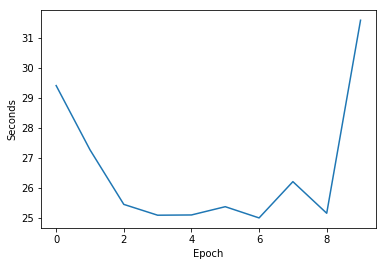

In [16]:
plt.plot(time_array_lp)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Error

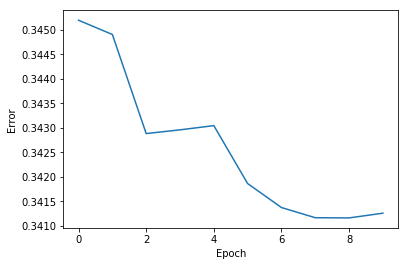

In [17]:
plt.plot(loss_array_lp)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()